<a href="https://colab.research.google.com/github/jdidoutourayaencg-cpu/22006654-JDIDOU-TOURAYA/blob/main/22006654.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Bibliothèques importées avec succès.

2. Chargement du dataset Kaggle 'AI Index'...
Fichiers disponibles dans le dataset /kaggle/input/ai-index :
/kaggle/input/ai-index/AI_index_db.csv


Using Colab cache for faster access to the 'ai-index' dataset.
   Données chargées avec succès !
   Taille du dataset : (62, 13)

Aperçu :
                    Country  Talent  Infrastructure  Operating Environment  \
0  United States of America  100.00           94.02                  64.56   
1                     China   16.51          100.00                  91.57   
2            United Kingdom   39.65           71.43                  74.65   
3                    Canada   31.28           77.05                  93.94   
4                    Israel   35.76           67.58                  82.44   

   Research  Development  Government Strategy  Commercial  Total score  \
0    100.00       100.00                77.39      100.00       100.00   
1     71.42        79.97                94.87       44

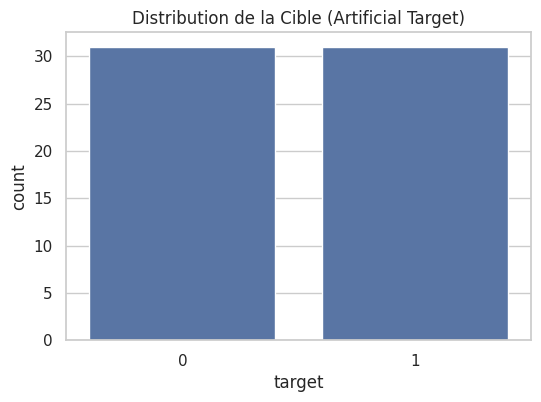

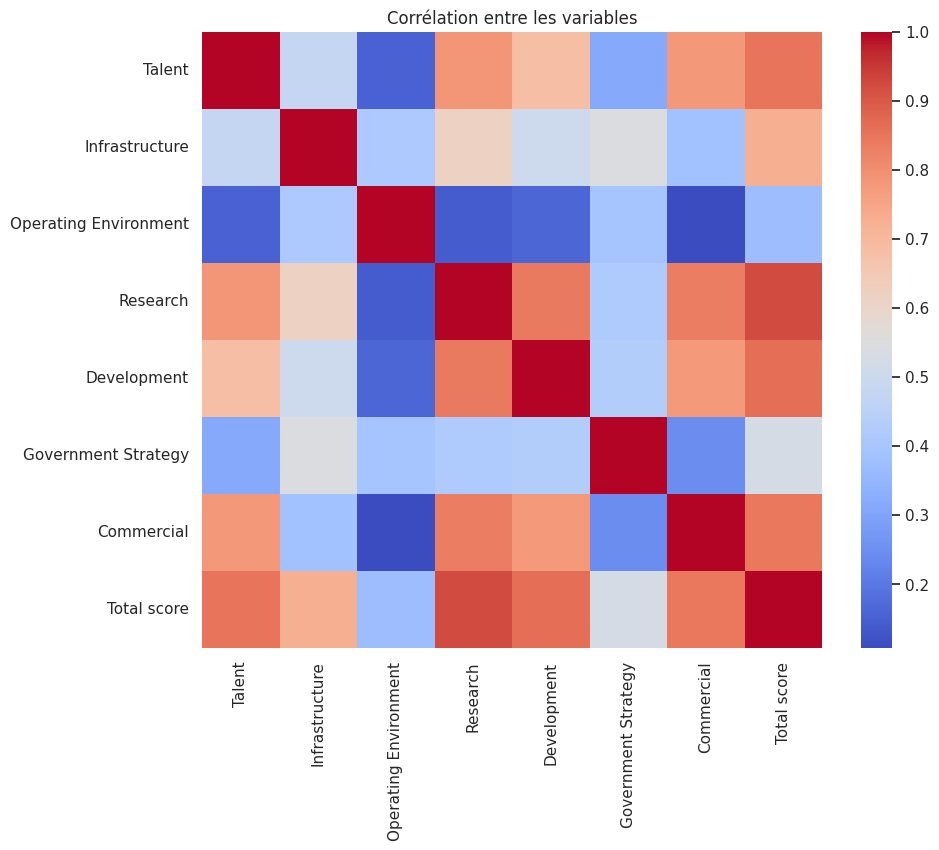

7. Séparation Train/Test...
   Train : 49 échantillons
   Test  : 13 échantillons

8. Entraînement du modèle Random Forest...
   Modèle entraîné avec succès.

9. Évaluation du modèle IA...
   Accuracy : 92.31%

   Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      1.00      0.91         5

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.92        13
weighted avg       0.94      0.92      0.92        13



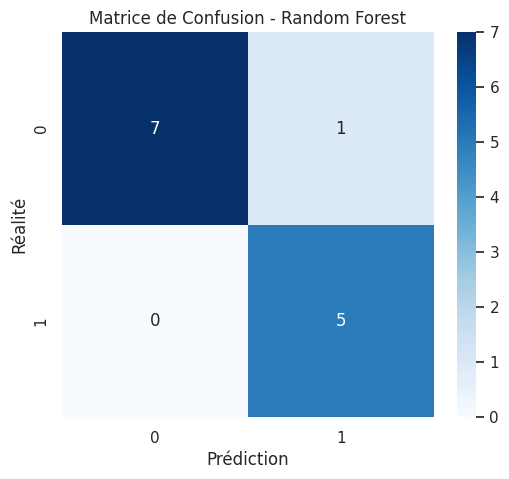


--- FIN DU SCRIPT ---


In [9]:
# ==============================================================================
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
from kagglehub import KaggleDatasetAdapter

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("1. Bibliothèques importées avec succès.\n")


# ==============================================================================
# 2. CHARGEMENT DU DATASET KAGGLE
# ==============================================================================
print("2. Chargement du dataset Kaggle 'AI Index'...")

# Listing files to identify the correct CSV file name
import os
dataset_path = '/kaggle/input/ai-index'
print(f"Fichiers disponibles dans le dataset {dataset_path} :")
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("\n")

file_path = "AI_index_db.csv"   # ⚠️ Mets le nom exact du fichier présent dans le dataset !!

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "katerynameleshenko/ai-index",
    file_path
)

print("   Données chargées avec succès !")
print(f"   Taille du dataset : {df.shape}")
print("\nAperçu :")
print(df.head(), "\n")


# ==============================================================================
# 3. SIMULATION D’UNE CIBLE (Target) POUR LE MACHINE LEARNING
# ==============================================================================
print("3. Création d'une cible artificielle pour le Machine Learning...")

# Conversion de toutes les colonnes numériques uniquement
df_numeric = df.select_dtypes(include=['float64', 'int64']).copy()

if df_numeric.shape[1] == 0:
    raise ValueError("Aucune colonne numérique trouvée dans le dataset !")

# On crée une target artificielle (1 si la 1ère colonne numérique > médiane)
first_col = df_numeric.columns[0]
df['target'] = (df_numeric[first_col] > df_numeric[first_col].median()).astype(int)

print(f"   Variable cible créée à partir de : {first_col}\n")
print(df[['target']].head())


# ==============================================================================
# 4. INTRODUCTION ARTIFICIELLE DE DONNÉES MANQUANTES
# ==============================================================================
print("4. Introduction artificielle de NaN dans 5% des données...")

df_dirty = df.copy()
for col in df_numeric.columns:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Nombre total de NaN ajoutés : {df_dirty.isnull().sum().sum()}\n")


# ==============================================================================
# 5. NETTOYAGE ET PRÉPARATION DES DONNÉES
# ==============================================================================
print("5. Nettoyage & Imputation...")

X = df_dirty.drop('target', axis=1)
y = df_dirty['target']

# Conserver uniquement les features numériques pour le modèle
X = X.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='mean')
X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("   Imputation terminée.")
print(f"   NaN restants : {X_clean.isnull().sum().sum()}\n")


# ==============================================================================
# 6. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ==============================================================================
print("6. Analyse Exploratoire des Données...")

print("\nStatistiques descriptives :")
print(X_clean.describe().T)

# Distribution de la target
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Distribution de la Cible (Artificial Target)")
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(X_clean.corr(), cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()


# ==============================================================================
# 7. SÉPARATION DES DONNÉES (Train/Test)
# ==============================================================================
print("7. Séparation Train/Test...")

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

print(f"   Train : {X_train.shape[0]} échantillons")
print(f"   Test  : {X_test.shape[0]} échantillons\n")


# ==============================================================================
# 8. MODÉLISATION (IA - RANDOM FOREST)
# ==============================================================================
print("8. Entraînement du modèle Random Forest...")

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné avec succès.\n")


# ==============================================================================
# 9. ÉVALUATION DU MODÈLE
# ==============================================================================
print("9. Évaluation du modèle IA...")

y_pred = model.predict(X_test)

print(f"   Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%\n")

print("   Rapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

print("\n--- FIN DU SCRIPT ---")